In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/1960sClassicHits.csv")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
df

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
0,Night,Jackie Wilson,1:26,4,0.482,0.757,6,-4.586,1,0.0355,0.01370,0.001600,0.1430,0.120,142.579,88,1960
1,Why,Frankie Avalon,2:41,4,0.691,0.631,2,-6.478,1,0.0368,0.04830,0.000011,0.1040,0.800,92.004,85,1960
2,I’m Sorry,Brenda Lee,2:47,5,0.445,0.455,7,-6.405,1,0.0575,0.73100,0.000001,0.1240,0.151,109.885,81,1960
3,Wild One,Bobby Rydell,2:21,4,0.662,0.550,0,-5.816,1,0.0366,0.00354,0.000009,0.4060,0.308,136.184,80,1960
4,Love You So,Ron Holden,3:08,4,0.858,0.678,1,-3.870,0,0.0469,0.07610,0.000000,0.0741,0.922,117.009,79,1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,Everybody’s Talkin’,Harry Nilsson,2:11,4,0.609,0.952,8,-2.758,1,0.0277,0.13300,0.000012,0.1360,0.968,99.147,17,1969
993,Who’s Making Love,Johnnie Taylor,3:48,4,0.677,0.637,11,-8.545,0,0.0439,0.10200,0.000000,0.3550,0.598,96.179,11,1969
994,I’ll Never Fall In Love Again,Tom Jones,5:34,4,0.393,0.343,2,-11.336,1,0.1040,0.84700,0.000000,0.6380,0.484,75.492,11,1969
995,Witchita Lineman,Glen Campbell,3:27,4,0.132,0.882,9,-10.754,1,0.0551,0.03560,0.178000,0.1270,0.139,170.113,6,1969


**import pandas as pd**
Mengimpor library Pandas dan menetapkannya sebagai alias pd. Pandas digunakan untuk manipulasi dan analisis data, terutama dalam bentuk tabel atau data frame.

**import numpy as np**
Mengimpor library NumPy sebagai alias np. NumPy digunakan untuk komputasi numerik, terutama untuk array dan operasi matematika.

**import matplotlib.pyplot as plt**
Mengimpor modul pyplot dari library Matplotlib dan menetapkannya sebagai alias plt. Pyplot digunakan untuk membuat berbagai jenis grafik dan visualisasi data.

**import seaborn as sns**
Mengimpor library Seaborn sebagai alias sns. Seaborn adalah library visualisasi data yang dibangun di atas Matplotlib, dan lebih mudah digunakan untuk membuat grafik statistik.

**df = pd.read_csv("/content/1960sClassicHits.csv")**
Memuat file CSV bernama 1960sClassicHits.csv dari direktori /content/. Fungsi pd.read_csv() digunakan untuk membaca file CSV dan menyimpannya dalam bentuk data frame dengan nama df.

Data frame df adalah struktur data berbentuk tabel yang terdiri dari baris dan kolom, di mana setiap kolom berisi satu jenis data, misalnya angka, teks, dll.

##1. Tampilkan rata-rata, standar deviasi, nilai minimum, nilai maksimum, Q1, Q2, dan Q3 dari attribute bertipe angka.

In [ ]:
#1. Tampilkan rata-rata, standar deviasi, nilai minimum, nilai maksimum, Q1, Q2, dan Q3 dari attribute bertipe angka.
numeric_columns = df.select_dtypes(include='number')
stats_summary = numeric_columns.describe(percentiles=[0.25, 0.5, 0.75]).T
# Menampilkan hasil
print(stats_summary)

                  count         mean        std          min        25%  \
Time_Signature    997.0     3.896690   0.423173     0.000000     4.0000   
Danceability      997.0     0.558485   0.162289     0.000000     0.4470   
Energy            997.0     0.562695   0.215709     0.000195     0.4040   
Key               997.0     5.012036   3.467267     0.000000     2.0000   
Loudness          997.0    -9.504534   4.476365   -47.359000   -11.7730   
Mode              997.0     0.757272   0.428947     0.000000     1.0000   
Speechiness       997.0     0.058835   0.059380     0.000000     0.0321   
Acousticness      997.0     0.415438   0.302048     0.000009     0.1310   
Instrumentalness  997.0     0.073302   0.220525     0.000000     0.0000   
Liveness          997.0     0.200990   0.167786     0.018900     0.0962   
Valence           997.0     0.620136   0.248932     0.000000     0.4470   
Tempo             997.0   121.163544  29.144779     0.000000   100.8390   
Popularity        997.0  

**df.select_dtypes(include='number'):**

Fungsi ini memilih hanya kolom-kolom yang memiliki tipe data numerik dari DataFrame df. Ini berguna untuk memastikan bahwa analisis deskriptif hanya dilakukan pada data yang relevan.
numeric_columns.describe(percentiles=[0.25, 0.5, 0.75]):

**Fungsi describe()**

menghasilkan ringkasan statistik deskriptif untuk kolom-kolom yang dipilih.
Parameter percentiles digunakan untuk menentukan persentil tambahan yang ingin ditampilkan. Dalam hal ini, persentil 25% (kuartil pertama), 50% (median), dan 75% (kuartil ketiga) dihitung dan ditampilkan.
.T:

Ini adalah transposisi dari hasil deskriptif, yang berarti baris dan kolomnya akan ditukar. Hal ini dapat membantu dalam pembacaan hasil statistik, sehingga setiap kolom statistik menjadi baris dan setiap kolom dari DataFrame menjadi kolom.

**print(stats_summary):**

Ini menampilkan ringkasan statistik yang telah dihitung di konsol.

##2. Tampilkan 10 record pertama dari dataset dengan attribute bertipe angka.

In [ ]:
#2. Tampilkan 10 record pertama dari dataset dengan attribute bertipe angka.
numeric_columns.head(10)

,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
0,4,0.482,0.757,6,-4.586,1,0.0355,0.01370,0.001600,0.1430,0.120,142.579,88,1960
1,4,0.691,0.631,2,-6.478,1,0.0368,0.04830,0.000011,0.1040,0.800,92.004,85,1960
2,5,0.445,0.455,7,-6.405,1,0.0575,0.73100,0.000001,0.1240,0.151,109.885,81,1960
3,4,0.662,0.550,0,-5.816,1,0.0366,0.00354,0.000009,0.4060,0.308,136.184,80,1960
4,4,0.858,0.678,1,-3.870,0,0.0469,0.07610,0.000000,0.0741,0.922,117.009,79,1960
5,4,0.338,0.340,9,-12.049,0,0.0339,0.58000,0.003200,0.1160,0.197,82.433,78,1960
6,4,0.271,0.165,5,-20.652,1,0.0351,0.72600,0.000002,0.1180,0.202,77.082,78,1960
7,4,0.573,0.929,8,-3.942,0,0.1090,0.19700,0.000112,0.0567,0.582,127.934,77,1960
8,4,0.487,0.650,0,-5.195,1,0.0253,0.19100,0.000000,0.0933,0.456,151.964,77,1960
9,4,0.454,0.931,11,-4.083,1,0.0321,0.23800,0.000623,0.2890,0.462,137.945,75,1960


Perintah numeric_columns.head(10) akan menampilkan 10 baris pertama dari DataFrame numeric_columns, yang berisi kolom-kolom dengan tipe data numerik yang telah dipilih sebelumnya.

##3. Tampilkan informasi jumlah record, jumlah attribute, nama attribute, jumlah attribute dengan tipe angka.

In [ ]:
#3. Tampilkan informasi jumlah record, jumlah attribute, nama attribute, jumlah attribute dengan tipe angka.

# Menghitung jumlah record dan jumlah atribut
num_records = df.shape[0]
num_attributes = df.shape[1]

# Mendapatkan nama-nama atribut
attribute_names = df.columns.tolist()

# Menghitung jumlah atribut dengan tipe angka
num_numeric_attributes = numeric_columns.shape[1]

# Menampilkan informasi
print(f"Jumlah record: {num_records}")
print(f"Jumlah attribute: {num_attributes}")
print(f"Nama attribute: {attribute_names}")
print(f"Jumlah attribute bertipe angka: {num_numeric_attributes}")

Jumlah record: 997
Jumlah attribute: 17
Nama attribute: ['Track', 'Artist', 'Duration', 'Time_Signature', 'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Popularity', 'Year']
Jumlah attribute bertipe angka: 14


num_records = df.shape[0]:

df.shape mengembalikan tuple yang berisi jumlah baris dan kolom dari DataFrame. shape[0] memberikan jumlah baris, yang disebut juga sebagai jumlah record atau entri dalam DataFrame.
num_attributes = df.shape[1]:

shape[1] memberikan jumlah kolom dalam DataFrame, yang disebut juga sebagai jumlah atribut.
attribute_names = df.columns.tolist():

df.columns mengembalikan daftar nama kolom dalam DataFrame. Dengan menggunakan .tolist(), nama-nama kolom tersebut dikonversi menjadi daftar Python, yang memudahkan untuk mengelola dan menampilkan nama-nama atribut.
num_numeric_attributes = numeric_columns.shape[1]:

Di sini, numeric_columns.shape[1] menghitung jumlah kolom (atribut) dalam DataFrame numeric_columns, yang berisi hanya kolom-kolom dengan tipe data numerik. Ini memberikan jumlah atribut yang bertipe angka.
print(...):

Kode ini menampilkan informasi yang telah dihitung:
Jumlah record (baris) dalam DataFrame.
Jumlah atribut (kolom) dalam DataFrame.
Daftar nama atribut (kolom) yang ada.
Jumlah atribut yang bertipe angka.

##4. Tampilkan jumlah label dari semua attribute yang bernilai object (contoh : Jenis Kelamin, Agama).


In [ ]:
#4. Tampilkan jumlah label dari semua attribute yang bernilai object (contoh : Jenis Kelamin, Agama).

# Memilih kolom bertipe object (kategorikal)
object_columns = df.select_dtypes(include='object') # Changed 'data' to 'df'

# Menghitung jumlah label unik untuk setiap atribut bertipe object
unique_labels = object_columns.nunique()

# Menampilkan hasil
print(unique_labels)

Track       980
Artist      539
Duration    227
dtype: int64


object_columns = df.select_dtypes(include='object'):

Fungsi ini memilih semua kolom dalam DataFrame df yang memiliki tipe data object, yang umumnya digunakan untuk menyimpan data kategorikal atau string. Hasilnya adalah DataFrame baru (object_columns) yang hanya berisi kolom-kolom tersebut.
unique_labels = object_columns.nunique():

Fungsi nunique() menghitung jumlah nilai unik (label unik) untuk setiap kolom dalam DataFrame object_columns. Hasilnya adalah seri yang menunjukkan jumlah label unik untuk setiap atribut bertipe object.
print(unique_labels):

Kode ini menampilkan jumlah label unik yang dihitung untuk setiap kolom bertipe object di konsol.

##5. Visualisasikan dataset dengan salah satu grafik. Pilih grafik yang paling cocok untuk memvisualisasikan data tersebut.

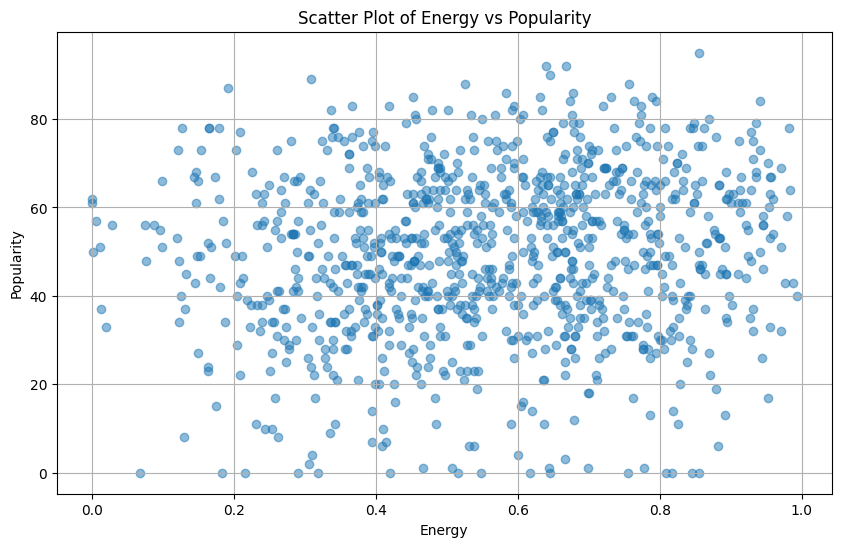

In [ ]:
#5. Visualisasikan dataset dengan salah satu grafik. Pilih grafik yang paling cocok untuk memvisualisasikan data tersebut.

plt.figure(figsize=(10,6))
plt.scatter(df['Energy'], df['Popularity'], alpha=0.5)
plt.title('Scatter Plot of Energy vs Popularity')
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

**plt.figure(figsize=(10,6)):**

Ini mengatur ukuran gambar plot yang akan dibuat. figsize=(10,6) berarti lebar gambar adalah 10 inci dan tinggi 6 inci.
plt.scatter(df['Energy'], df['Popularity'], alpha=0.5):

**Fungsi scatter()**

digunakan untuk membuat plot sebar. Di sini, sumbu x diisi dengan nilai kolom Energy dan sumbu y diisi dengan nilai kolom Popularity dari DataFrame df.
Parameter alpha=0.5 mengatur transparansi titik-titik pada plot. Nilai 0.5 berarti titik akan setengah transparan, sehingga dapat membantu visualisasi jika ada tumpang tindih titik.

**plt.title('Scatter Plot of Energy vs Popularity'):**

Menambahkan judul pada plot dengan teks "Scatter Plot of Energy vs Popularity".


**plt.xlabel('Energy'):**


Mengatur label untuk sumbu x dengan teks "Energy".
plt.ylabel('Popularity'):

Mengatur label untuk sumbu y dengan teks "Popularity".
plt.grid(True):

Menampilkan grid pada plot, yang dapat membantu dalam membaca nilai-nilai di plot.

**plt.show():**

Menampilkan plot yang telah dibuat. Fungsi ini diperlukan untuk menampilkan gambar pada layar.

##6. Tampilkan korelasi dataset menggunakan heatmap.

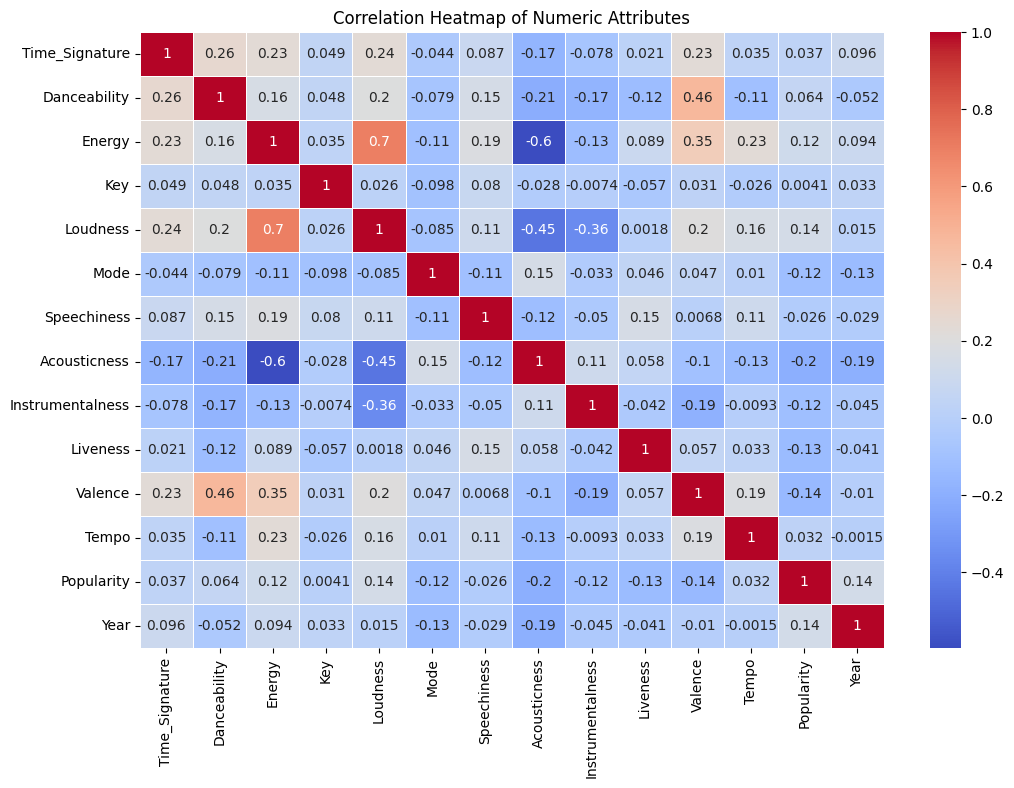

In [ ]:
#6. Tampilkan korelasi dataset menggunakan heatmap.

# Menghitung korelasi antar atribut numerik
correlation_matrix = numeric_columns.corr()

# Membuat heatmap menggunakan seaborn
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Attributes')
plt.show()


**correlation_matrix = numeric_columns.corr():**

Menghitung matriks korelasi untuk kolom-kolom numerik dalam DataFrame numeric_columns. Fungsi corr() menghitung koefisien korelasi Pearson antara setiap pasangan atribut, menghasilkan DataFrame baru yang menunjukkan tingkat hubungan antar atribut.

**plt.figure(figsize=(12,8)):**

Mengatur ukuran gambar heatmap yang akan dibuat. Dalam hal ini, lebar adalah 12 inci dan tinggi 8 inci.

**sns.heatmap(correlation_matrix, annot=True,
cmap='coolwarm', linewidths=0.5):**

**Fungsi heatmap()** dari Seaborn digunakan untuk membuat heatmap dari matriks korelasi.

**annot=True** menampilkan nilai korelasi di setiap sel dalam heatmap.

**cmap='coolwarm'** mengatur palet warna untuk heatmap, di mana warna dingin (biru) menunjukkan korelasi negatif dan warna hangat (merah) menunjukkan korelasi positif.

**linewidths=0.5** memberikan garis pemisah tipis antara sel-sel dalam heatmap.
**plt.title('Correlation Heatmap of Numeric Attributes'):**

Menambahkan judul pada heatmap.

**plt.show():**

Menampilkan heatmap yang telah dibuat.

##7. Tulis kesimpulan dari hasil analisis dan visualisasi data. Tulis pada cell  Markdown.

1. **Distribusi Data Numerik**:
   - Dari hasil statistik, atribut seperti `Energy`, `Danceability`, dan `Popularity` punya variasi yang cukup besar.
   - Nilai tengah (median) dari banyak atribut numerik menunjukkan distribusi data yang cukup seimbang, walaupun ada beberapa atribut seperti `Loudness` yang rentang nilainya cukup lebar.

2. **Hubungan Antar Variabel**:
   - Dari scatter plot antara `Energy` dan `Popularity`, terlihat bahwa datanya cukup tersebar. Meskipun nggak ada pola linear yang jelas, ada indikasi kalau lagu dengan energi tinggi cenderung lebih populer.
   
3. **Korelasi Antar Atribut**:
   - Heatmap korelasi menunjukkan beberapa hubungan menarik antar atribut numerik.
   - Ada korelasi positif antara `Energy` dan `Popularity`, yang artinya lagu dengan energi lebih tinggi mungkin cenderung lebih populer.
   - `Loudness` juga punya korelasi positif dengan `Energy`, artinya lagu-lagu dengan energi tinggi cenderung lebih keras volumenya.
   - Sebaliknya, `Acousticness` punya korelasi negatif dengan `Energy` dan `Loudness`, menunjukkan kalau lagu yang lebih akustik cenderung lebih tenang dan energinya lebih rendah.

4. **Potensi Pengembangan**:
   - Dari hasil korelasi, analisis ini bisa dikembangkan lebih lanjut untuk prediksi atau klasifikasi. Misalnya, bisa dibuat model untuk memprediksi popularitas lagu berdasarkan fitur-fitur seperti `Energy`, `Danceability`, dan `Loudness`.


#POSTTEST 3

#1.Data Cleaning

###Handling Missing Value

In [ ]:
print("Nilai missing sebelum ditangani:\n", df.isnull().sum())
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)
print("\nNilai missing setelah ditangani:\n", df.isnull().sum())

Nilai missing sebelum ditangani:
 Track               0
Artist              0
Duration            0
Time_Signature      0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Popularity          0
Year                0
dtype: int64

Nilai missing setelah ditangani:
 Track               0
Artist              0
Duration            0
Time_Signature      0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Popularity          0
Year                0
dtype: int64


Missing Value: Jika ada kolom yang punya data kosong, kita bisa mengisinya. Untuk data numerik, kita isi dengan rata-rata (mean). Sedangkan untuk data kategorikal, kita isi dengan modus (nilai yang paling sering muncul).

###Handling Duplicate Value

In [ ]:
print("\nJumlah duplikasi sebelum ditangani:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Jumlah duplikasi setelah ditangani:", df.duplicated().sum())


Jumlah duplikasi sebelum ditangani: 0
Jumlah duplikasi setelah ditangani: 0


Duplikasi: Kalau ada baris data yang sama persis, kita hapus supaya tidak mempengaruhi analisis.

###Handling Outliers

In [ ]:
# Menangani outlier (jika ada) menggunakan metode IQR
kolom_numerik = df.select_dtypes(include=np.number).columns
Q1 = df[kolom_numerik].quantile(0.25)
Q3 = df[kolom_numerik].quantile(0.75)
IQR = Q3 - Q1
df_bersih_outlier = df[~((df[kolom_numerik] < (Q1 - 1.5 * IQR)) | (df[kolom_numerik] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("\nJumlah data setelah menangani outlier:", df_bersih_outlier.shape[0])


Jumlah data setelah menangani outlier: 428


Outlier: Kita cek data yang nilai-nilainya sangat jauh dari kebanyakan data (outliers). Kalau ada, kita bisa menghapusnya menggunakan metode IQR (Interquartile Range).

#2. Normalisasi/standarisasi kolom numerik

In [ ]:
# Normalisasi / Standarisasi Kolom Numerik
scaler = StandardScaler()
df_bersih_outlier[kolom_numerik] = scaler.fit_transform(df_bersih_outlier[kolom_numerik])

print("\n5 data pertama setelah standarisasi:\n", df_bersih_outlier.head())


5 data pertama setelah standarisasi:
               Track              Artist Duration  Time_Signature  \
0             Night       Jackie Wilson     1:26             0.0   
1               Why      Frankie Avalon     2:41             0.0   
3          Wild One        Bobby Rydell     2:21             0.0   
8           Forever  The Little Dippers     3:52             0.0   
9  A Million To One       Jimmy Charles     2:40             0.0   

   Danceability    Energy       Key  Loudness  Mode  Speechiness  \
0     -0.639327  0.912284  0.306873  1.319290   0.0    -0.351014   
1      0.885430  0.277226 -0.871079  0.727888   0.0    -0.253284   
3      0.673861 -0.131026 -1.460055  0.934816   0.0    -0.268319   
8     -0.602849  0.372988 -1.460055  1.128929   0.0    -1.117821   
9     -0.843600  1.789269  1.779313  1.476518   0.0    -0.606616   

   Acousticness  Instrumentalness  Liveness   Valence     Tempo  Popularity  \
0     -1.379448          8.195697 -0.276715 -2.336844  0.950552 

<ipython-input-8-d01bc3beadec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bersih_outlier[kolom_numerik] = scaler.fit_transform(df_bersih_outlier[kolom_numerik])


Data numerik sering punya skala yang berbeda-beda. Misalnya, kolom Danceability punya nilai antara 0 sampai 1, sedangkan kolom Duration bisa bernilai ratusan detik. Supaya model prediksi tidak bingung, kita harus standarisasi atau normalisasi nilai-nilai ini. Di sini, kita pakai StandardScaler supaya semua kolom punya nilai rata-rata 0 dan standar deviasi 1.

#3. Encoding kolom kategorikal

In [ ]:
# Encoding Kolom Kategorikal (OneHotEncoding)
kolom_kategorikal = df_bersih_outlier.select_dtypes(include='object').columns
encoder = OneHotEncoder(sparse_output=False, drop='first')  # One-hot encoding untuk kolom kategorikal, ganti sparse dengan sparse_output
data_kategorikal_encoded = pd.DataFrame(encoder.fit_transform(df_bersih_outlier[kolom_kategorikal]))

# Menambahkan nama kolom kembali ke data yang di-encode
data_kategorikal_encoded.columns = encoder.get_feature_names_out(kolom_kategorikal)

# Menghapus kolom kategorikal asli dan menambahkan kolom yang sudah di-encode
df_encoded = df_bersih_outlier.drop(columns=kolom_kategorikal).reset_index(drop=True)
df_encoded = pd.concat([df_encoded, data_kategorikal_encoded], axis=1)

print("\n5 data pertama setelah encoding:\n", df_encoded.head())


5 data pertama setelah encoding:
    Time_Signature  Danceability    Energy       Key  Loudness  Mode  \
0             0.0     -0.639327  0.912284  0.306873  1.319290   0.0   
1             0.0      0.885430  0.277226 -0.871079  0.727888   0.0   
2             0.0      0.673861 -0.131026 -1.460055  0.934816   0.0   
3             0.0     -0.602849  0.372988 -1.460055  1.128929   0.0   
4             0.0     -0.843600  1.789269  1.779313  1.476518   0.0   

   Speechiness  Acousticness  Instrumentalness  Liveness  ...  Duration_4:41  \
0    -0.351014     -1.379448          8.195697 -0.276715  ...            0.0   
1    -0.253284     -1.257634         -0.252560 -0.645366  ...            0.0   
2    -0.268319     -1.415218         -0.265056  2.209313  ...            0.0   
3    -1.117821     -0.755237         -0.312650 -0.746509  ...            0.0   
4    -0.606616     -0.589767          3.000288  1.103361  ...            0.0   

   Duration_4:49  Duration_4:55  Duration_5:08  Duration_

Kolom yang isinya teks atau kategori (seperti genre atau mode) tidak bisa dipakai langsung oleh model prediksi. Jadi, kita perlu mengubahnya jadi angka. Salah satu caranya adalah dengan OneHotEncoding. Metode ini membuat kolom baru untuk setiap kategori, dan isinya 1 atau 0, tergantung apakah data tersebut termasuk dalam kategori itu atau tidak.

#4. Feature engineering (minimal 1 feature baru)

In [ ]:
# Contoh: Membuat fitur baru yang menggabungkan 'Energy' dan 'Danceability'
df_encoded['High_Energy_Dance'] = df_encoded['Energy'] * df_encoded['Danceability']

print("\n5 data pertama setelah rekayasa fitur (fitur baru 'High_Energy_Dance'):\n", df_encoded[['Energy', 'Danceability', 'High_Energy_Dance']].head())


5 data pertama setelah rekayasa fitur (fitur baru 'High_Energy_Dance'):
      Energy  Danceability  High_Energy_Dance
0  0.912284     -0.639327          -0.583247
1  0.277226      0.885430           0.245464
2 -0.131026      0.673861          -0.088293
3  0.372988     -0.602849          -0.224856
4  1.789269     -0.843600          -1.509427


Feature engineering adalah proses membuat fitur baru dari data yang sudah ada. Fitur baru ini bisa membantu model prediksi menjadi lebih akurat. Misalnya, kita membuat fitur baru bernama High_Energy_Dance, yang merupakan hasil perkalian antara Energy dan Danceability. Ini bisa menggambarkan seberapa "enerjik" sebuah lagu berdasarkan tingkat danceability-nya.

#5. Splitting data ke dalam data training & data testing

In [ ]:
# Mengatur kolom 'Mode' sebagai target (y)
y = df_encoded['Mode']

# Menghapus kolom 'Mode' dari fitur X (karena itu adalah target yang ingin diprediksi)
X = df_encoded.drop(columns=['Mode'])

# Membagi data menjadi data training dan data testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nBentuk data training dan testing setelah menggunakan 'Mode' sebagai target:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Bentuk data training dan testing setelah menggunakan 'Mode' sebagai target:
X_train: (342, 855), X_test: (86, 855)
y_train: (342,), y_test: (86,)


Tahap ini adalah membagi dataset menjadi dua bagian: training data dan testing data. Data training dipakai untuk melatih model prediksi, sedangkan data testing dipakai untuk mengecek apakah model bisa memprediksi dengan baik data yang belum pernah dilihat sebelumnya. Kita membagi data menjadi 80% training dan 20% testing.

#Alasan Memilih Kolom "Mode" Sebagai Atribut Target Yang Diprediksi


1. Mode Itu Penting dalam Musik
Kalau di musik, "Mode" biasanya merujuk ke major atau minor. Lagu-lagu yang mode-nya major cenderung terdengar lebih ceria, sedangkan yang minor biasanya lebih mellow atau sedih. Jadi, memprediksi mode ini bisa membantu kita memahami karakter dari lagu-lagu tersebut. Misalnya, buat industri musik, mode ini bisa dipakai untuk bikin playlist yang cocok sama suasana hati pendengar.

2. Ada Hubungan Antara Mode dan Fitur Lain
Mode bisa dipengaruhi oleh banyak hal, kayak Energy, Danceability, atau Tempo dari lagu. Misalnya, apakah lagu yang energinya tinggi biasanya ada di mode major atau minor? Dengan memprediksi mode, kita bisa lebih ngerti hubungan antara mode musik dan atribut lain dari lagu.

3. Mode Penting Buat Pengalaman Pendengar
Pendengar musik sering kali punya selera tertentu soal mode lagu yang mereka suka. Ada yang suka lagu-lagu ceria (major), ada juga yang lebih suka lagu-lagu sendu (minor). Jadi, memprediksi mode ini bisa ngebantu bikin rekomendasi lagu yang lebih pas sama mood orang. Misalnya, kalau kita lagi sedih, playlist otomatis bisa milih lagu-lagu dengan mode minor.

4. Mode Itu Variabel yang Bisa Diklasifikasi
Mode ini biasanya berupa kategori, kayak major atau minor, jadi cocok banget untuk masalah klasifikasi. Kamu bisa bikin model yang memprediksi apakah sebuah lagu ada di mode major atau minor, berdasarkan fitur-fitur lain kayak Loudness, Tempo, Energy, dan lain-lain.

5. Bisa Ngerti Tren Musik
Dengan memprediksi mode, kamu juga bisa lihat gimana mode lagu-lagu berubah seiring waktu. Misalnya, di tahun 1960-an, apakah lagu-lagu lebih banyak yang minor daripada sekarang? Atau, gimana mode lagu memengaruhi popularitasnya? Analisis ini bisa bantu kita ngerti tren dalam dunia musik.
Alasan Memilih Kolom "Mode" Sebagai Atribut Target Yang Diprediksi karena itu adalah fitur yang penting dalam menentukan karakteristik dasar lagu, seperti suasana hati atau tonalitas. Prediksi mode bisa memberikan nilai tambah dalam berbagai aplikasi industri musik, seperti rekomendasi musik, analisis tren, atau penelitian akademis terkait dengan musik dan emosi.

Intinya, mode jadi target prediksi karena punya pengaruh besar dalam menentukan karakter lagu. Prediksi ini bisa berguna untuk banyak hal, dari bikin playlist otomatis sampai analisis tren musik dari masa ke masa. Jadi, langkah ini bisa membantu kamu memahami lebih dalam soal musik dan preferensi pendengarnya.

#POSTTEST 4

##A1. Implementasikan metode:
Support Vector Classifier (dari SVM), jika menggunakan label Kategorikal pada dataset kalian (Klasifikasi).
Point Plus: Jika ditambah menggunakan Random Forest/KNN/Naive Bayes/Metode Lainnya beserta penjelasannya pada markdown.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
def durasi_ke_detik(durasi):
  """Mengubah string durasi dalam format 'menit:detik' menjadi detik."""
  if isinstance(durasi, str) and ":" in durasi:
    menit, detik = map(int, durasi.split(':'))
    return menit * 60 + detik
  else:
    # Tangani kasus di mana durasi sudah numerik atau dalam format yang tidak terduga
    try:
      return float(durasi)  # Coba ubah ke float jika memungkinkan
    except ValueError:
      return None  # Atau kembalikan None untuk nilai yang tidak valid

# Terapkan fungsi ke kolom 'Duration'
df['Duration'] = df['Duration'].apply(durasi_ke_detik)

# Pilih kolom fitur (kecuali kolom "Track", "Artist", dan "Mode")
X = df.drop(columns=['Track', 'Artist', 'Mode'])  # Fitur
y = df['Mode']  # Target

# Bagi data menjadi data pelatihan dan pengujian
X_latih, X_uji, y_latih, y_uji = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Support Vector Classifier (SVC)
model_svc = SVC()
model_svc.fit(X_latih, y_latih)
y_pred_svc = model_svc.predict(X_uji)

# Evaluasi SVC
print("Akurasi SVC:", accuracy_score(y_uji, y_pred_svc))
print("Laporan Klasifikasi SVC:")
print(classification_report(y_uji, y_pred_svc))

# 2. Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_latih, y_latih)
y_pred_rf = model_rf.predict(X_uji)

# Evaluasi Random Forest
print("Akurasi Random Forest:", accuracy_score(y_uji, y_pred_rf))
print("Laporan Klasifikasi Random Forest:")
print(classification_report(y_uji, y_pred_rf))

# 3. K-Nearest Neighbors (KNN) Classifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_latih, y_latih)
y_pred_knn = model_knn.predict(X_uji)

# Evaluasi KNN
print("Akurasi KNN:", accuracy_score(y_uji, y_pred_knn))
print("Laporan Klasifikasi KNN:")
print(classification_report(y_uji, y_pred_knn))

Akurasi SVC: 0.7866666666666666
Laporan Klasifikasi SVC:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        64
           1       0.79      1.00      0.88       236

    accuracy                           0.79       300
   macro avg       0.39      0.50      0.44       300
weighted avg       0.62      0.79      0.69       300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Akurasi Random Forest: 0.7833333333333333
Laporan Klasifikasi Random Forest:
              precision    recall  f1-score   support

           0       0.47      0.12      0.20        64
           1       0.80      0.96      0.87       236

    accuracy                           0.78       300
   macro avg       0.64      0.54      0.54       300
weighted avg       0.73      0.78      0.73       300

Akurasi KNN: 0.75
Laporan Klasifikasi KNN:
              precision    recall  f1-score   support

           0       0.36      0.22      0.27        64
           1       0.81      0.89      0.85       236

    accuracy                           0.75       300
   macro avg       0.58      0.56      0.56       300
weighted avg       0.71      0.75      0.73       300



Support Vector Classifier (SVC): Model SVC mencoba menemukan garis atau hyperplane yang memisahkan dua kelas (0 dan 1) dengan margin yang paling besar.

Random Forest Classifier: Random Forest membuat beberapa pohon keputusan (decision trees) dari berbagai subset data, lalu menggabungkan hasilnya. Metode ini sangat bagus untuk data yang bervariasi.

K-Nearest Neighbors (KNN): KNN bekerja dengan melihat tetangga terdekat (data yang mirip) untuk menentukan kelas suatu titik data baru.

#A2. Hasil prediksi harus dievaluasi masing-masing:
Klasifikasi: Confusion Matrix (Cek File IPYNB) & Classification Report

Regresi: MAE, MSE, RMSE, dan R2-Score
Baik klasifikasi maupun regresi WAJIB ada penjelasannya.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression  # Mengimpor LinearRegression

# Inisialisasi dan latih model regresi (contoh: Linear Regression)
model_regresi = LinearRegression()  # Inisialisasi model
model_regresi.fit(X_latih, y_latih)  # Latih model dengan data latih

# Prediksi pada data uji
y_pred_regresi = model_regresi.predict(X_uji)

# 1. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_uji, y_pred_regresi)
print("Mean Absolute Error (MAE):", mae)

# 2. Mean Squared Error (MSE)
mse = mean_squared_error(y_uji, y_pred_regresi)
print("Mean Squared Error (MSE):", mse)

# 3. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# 4. R2 Score
r2 = r2_score(y_uji, y_pred_regresi)
print("R2 Score:", r2)


Mean Absolute Error (MAE): 0.33986793690668865
Mean Squared Error (MSE): 0.16476519919976834
Root Mean Squared Error (RMSE): 0.40591279753140125
R2 Score: 0.018215841632736485


Inisialisasi dan Pelatihan Model Regresi:

Pada kode model_regresi = LinearRegression(), kita menginisialisasi model regresi linear. Model ini adalah algoritma yang digunakan untuk memprediksi nilai numerik berdasarkan hubungan linear antara variabel input (fitur) dan variabel output (target).
Selanjutnya, kita melatih model tersebut dengan data latih (X_latih dan y_latih) menggunakan fungsi fit(). Di sini, model belajar dari data latih dan berusaha membangun model yang bisa memprediksi nilai target berdasarkan fitur.
Prediksi pada Data Uji:

Setelah model dilatih, kita melakukan prediksi menggunakan data uji X_uji dengan fungsi predict(). Hasil prediksi ini disimpan dalam variabel y_pred_regresi.
Evaluasi Hasil Prediksi:

MAE (Mean Absolute Error): Mengukur rata-rata kesalahan absolut antara nilai yang diprediksi dan nilai sebenarnya. Semakin kecil nilai MAE, semakin akurat model.

python
Copy code
mae = mean_absolute_error(y_uji, y_pred_regresi)
Hasilnya adalah nilai yang menunjukkan seberapa jauh rata-rata prediksi dari nilai sebenarnya.

MSE (Mean Squared Error): Mengukur rata-rata kesalahan kuadrat antara nilai yang diprediksi dan nilai sebenarnya. Kesalahan yang lebih besar mendapatkan penalti lebih tinggi karena dikuadratkan. Semakin kecil MSE, semakin akurat model.

python
Copy code
mse = mean_squared_error(y_uji, y_pred_regresi)
MSE sangat peka terhadap outlier karena kuadrat dari kesalahan. Jika nilai MSE kecil, model dianggap baik.

RMSE (Root Mean Squared Error): Merupakan akar kuadrat dari MSE. Ini mengembalikan kesalahan rata-rata ke skala yang sama dengan target asli. Semakin kecil nilai RMSE, semakin baik model dalam memprediksi.

python
Copy code
rmse = np.sqrt(mse)
R2 Score (Koefisien Determinasi): Nilai ini mengukur seberapa baik model dapat menjelaskan variabilitas dalam data. Nilai R² berkisar antara 0 hingga 1, di mana nilai mendekati 1 berarti model sangat baik dalam menjelaskan data. Jika nilainya negatif, model sangat buruk karena lebih buruk dari model prediksi rata-rata.

python
Copy code
r2 = r2_score(y_uji, y_pred_regresi)
Kesimpulan:
Dengan menggunakan evaluasi seperti MAE, MSE, RMSE, dan R2, kita bisa mengetahui seberapa baik model dalam melakukan prediksi.
MAE dan RMSE memberikan nilai rata-rata kesalahan prediksi, sedangkan R² memberikan gambaran seberapa baik model menangkap hubungan antara fitur dan target.

#A3. Buat plot untuk hasil prediksi-nya (wajib) se-menarik dan se-informatif mungkin.
Point Plus: Plot titik-titik hasil prediksi nilai pada target, beserta dengan titik-titik target aslinya

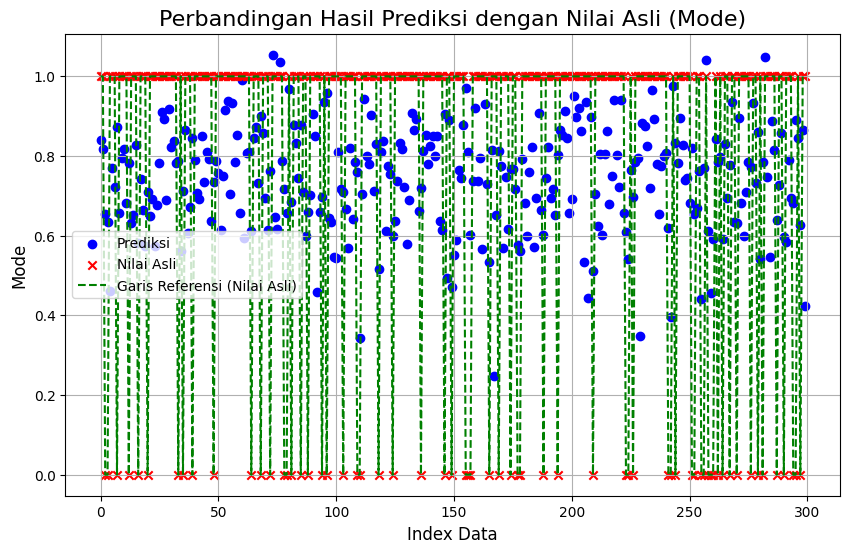

In [ ]:
# Membuat plot untuk hasil prediksi
plt.figure(figsize=(10, 6))

# Plot titik-titik hasil prediksi
plt.scatter(range(len(y_uji)), y_pred_regresi, color='blue', label='Prediksi', marker='o')

# Plot titik-titik nilai asli (target sebenarnya)
plt.scatter(range(len(y_uji)), y_uji, color='red', label='Nilai Asli', marker='x')

# Garis referensi untuk memperlihatkan perbedaan antara prediksi dan nilai asli
plt.plot(range(len(y_uji)), y_uji, color='green', linestyle='--', label='Garis Referensi (Nilai Asli)')

plt.title('Perbandingan Hasil Prediksi dengan Nilai Asli (Mode)', fontsize=16)
plt.xlabel('Index Data', fontsize=12)
plt.ylabel('Mode', fontsize=12)

plt.legend()

plt.grid(True)

plt.show()

Scatter plot digunakan untuk memvisualisasikan perbandingan antara hasil prediksi dan nilai asli dari target mode.

plt.scatter() digunakan dua kali untuk memplot nilai prediksi (biru) dan nilai asli (merah).
Dengan memplot kedua data pada grafik yang sama, kita bisa langsung melihat perbedaan antara hasil prediksi dan nilai asli.
Garis referensi (hijau putus-putus) menunjukkan hubungan ideal antara nilai asli dari target. Jika prediksi tepat, titik biru (prediksi) akan berada di garis referensi.

Judul, label, dan legenda membantu menjelaskan isi dari grafik. Ini membuat plot lebih mudah dimengerti dan menarik secara visual.

Visualisasi:
Titik biru mewakili nilai yang diprediksi oleh model.
Titik merah adalah nilai asli dari target mode.
Garis hijau memperlihatkan tren dari nilai asli, yang diikuti atau tidak oleh prediksi.
Dengan visualisasi ini, kita bisa langsung melihat apakah prediksi model dekat dengan nilai aslinya dan di mana kesalahannya.

#POSTTEST 5

In [10]:
# Import pustaka yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


##Memilih Fitur dan Target

In [4]:
X = df[['Danceability', 'Energy', 'Loudness', 'Valence', 'Tempo']]  # Fitur
y = df['Mode']  # Target (Mode)

X adalah matriks fitur yang mencakup beberapa kolom numerik seperti Danceability, Energy, Loudness, dll.
y adalah target, yaitu kolom 'Mode', yang berisi nilai biner (0 atau 1).

### Memisahkan data menjadi data latih dan validasi (80% latih, 20% validasi)

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

train_test_split memisahkan data menjadi 80% data latih dan 20% data validasi, dengan parameter random_state untuk memastikan hasil yang konsisten setiap kali kode dijalankan.

### Skala fitur (Standarisasi)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

StandardScaler digunakan untuk menstandarkan fitur, sehingga memiliki mean 0 dan standar deviasi 1, yang membantu meningkatkan performa model neural network.

## Membangun model Sequential deep learning

In [11]:
model = Sequential()

# Menambahkan lapisan
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Sequential adalah model linier di mana lapisan dibangun satu demi satu.
Dense adalah lapisan fully-connected. Tiga lapisan yang digunakan:
Lapisan pertama: 64 neuron dengan aktivasi ReLU dan input dari fitur.
Lapisan kedua: 32 neuron dengan aktivasi ReLU.
Lapisan ketiga: 1 neuron dengan aktivasi sigmoid untuk klasifikasi biner (hasilnya adalah nilai probabilitas antara 0 dan 1).

optimizer='adam': Optimizer Adam adalah algoritma optimasi yang sering digunakan karena konvergensi cepat.
loss='binary_crossentropy': Digunakan untuk masalah klasifikasi biner.
metrics=['accuracy']: Metrik yang digunakan untuk mengevaluasi performa model adalah akurasi.

## Melatih model dan Evaluasi model


In [12]:
# Melatih model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val))

# Evaluasi model
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train)
val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.6645 - loss: 0.6401 - val_accuracy: 0.8100 - val_loss: 0.5414
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7448 - loss: 0.5723 - val_accuracy: 0.8100 - val_loss: 0.5249
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7157 - loss: 0.5885 - val_accuracy: 0.8100 - val_loss: 0.5244
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7534 - loss: 0.5270 - val_accuracy: 0.8100 - val_loss: 0.5187
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7443 - loss: 0.5438 - val_accuracy: 0.8150 - val_loss: 0.5231
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7479 - loss: 0.5338 - val_accuracy: 0.8100 - val_loss: 0.5131
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7643 - loss: 0.5129 - val_accuracy: 0.8200 - val_loss: 0.5141
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7549 - loss: 0.5385 - val_accuracy: 0.8150 - val_l

fit: Melatih model dengan 50 epoch (iterasi) dan batch size 32. Model juga divalidasi pada data validasi untuk memonitor performanya.
validation_data: Menyediakan set validasi selama pelatihan untuk melacak akurasi model pada data yang tidak terlihat.

evaluate: Mengevaluasi performa model pada data latih dan validasi.
Menampilkan akurasi pelatihan dan validasi dalam bentuk persentase.

##Hasil

In [13]:
print(f"Akurasi Training: {train_accuracy * 100:.2f}%")
print(f"Akurasi Validasi: {val_accuracy * 100:.2f}%")

Akurasi Training: 78.04%
Akurasi Validasi: 78.50%


Menampilkan akurasi pelatihan dan validasi dalam bentuk persentase.

##Visualisasi Akurasi

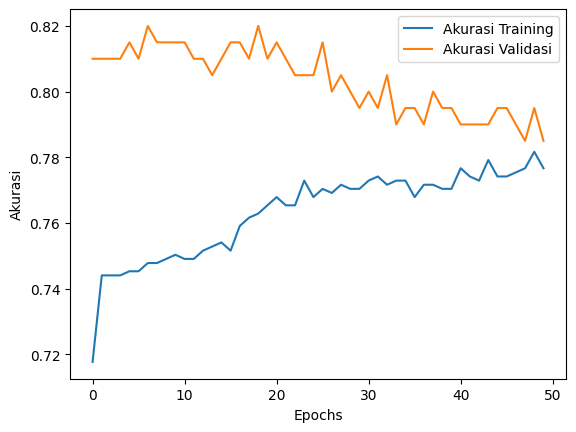

In [15]:
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()
plt.show()

history.history menyimpan riwayat pelatihan termasuk akurasi dan akurasi validasi.
plt.plot digunakan untuk memvisualisasikan perkembangan akurasi dari epoch ke epoch selama pelatihan.

##Kesimpulan

Model ini menggunakan arsitektur neural network sederhana untuk melakukan klasifikasi biner pada dataset musik. Target klasifikasi adalah kolom 'Mode', dan model dilatih untuk memprediksi apakah nilai target adalah 0 atau 1 berdasarkan fitur-fitur numerik seperti Danceability, Energy, Loudness, dll. Hasil akhir mencakup evaluasi akurasi pada data pelatihan dan validasi serta visualisasi kinerja pelatihan model.